<h1>Linear Algebra (CpE210A)</h1>


<h3>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib</h3>
    


<p>Coded and submitted by:<br>Guy, Lawrence Adrian, B.<br>58010 </p>

<h2> Part 1: Skyline Eagle Fly </h2>
<h3>Lab exercises:</h3>
<p>You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative <b>displacement</b> of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below: <br> <br>
Consider the computational algorithm: <br> 
Let the eagle's longitudinal and latitudinal be  $long$  and  $lat$  respectively. <br>
Let the eagle's total distance as  $dist_{total}$ , displacement be  $disp$ , and  $θ$  as the direction of the vector. 

$ _{(Eq.1)}dist_{total}=(long_{total})\hat{x}+(lat_{total})\hat{y} $ <br>
$ _{(Eq.2)}disp = \sqrt{dist_{x}^2+dist_{y}^2}$ <br>
$ _{(Eq.3)}\theta = arctan(\frac{y}{\alpha+x})$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


%matplotlib inline

In [4]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.
    
    dist1 = np.array([long[0],lat[0]])                            ## setup the array for each vector for the eagle's flight.  
    dist2 = np.array([long[1],lat[1]])         
    dist3 = np.array([long[2],lat[2]])           
    
    

    
    dist_total = np.add(np.add(dist1,dist2),dist3)          ## compute for the resultant vector for the eagle's flight.
   
  

    disp = np.sqrt((dist_total[0]**2)+(dist_total[1]**2))             ## compute for the magnitude of the displacement
    alpha = 10**-6
    theta =  np.arctan(dist_total[1]/(dist_total[0]+alpha))              ## compute for the angle of the displacement. Hint
    theta = np.degrees(theta)                                          ## convert theta from rad to deg.
     
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
               label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
               label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
               label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
    
## END OF FUNCTION  

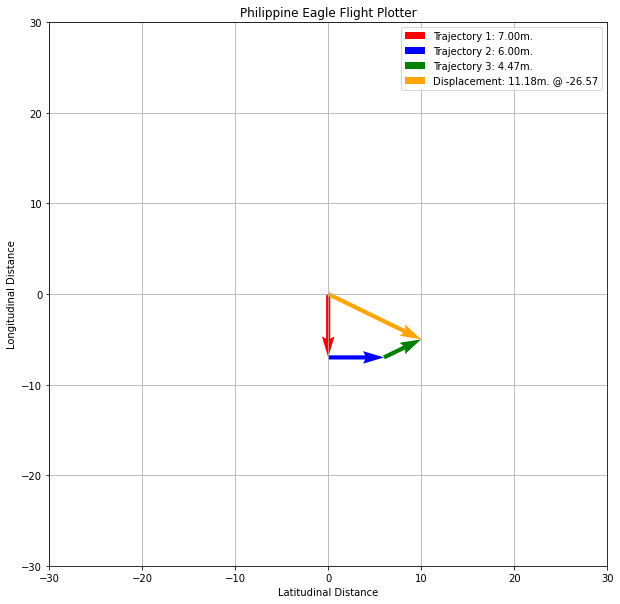

In [5]:
track_eagle(make_figs=False)

<p> The use of the variable α is to add some value to X so that when X becomes 0 when calculating for the theta, it wouldn't result to an undefined value or NaN. The value of α is small to the point that there's no visible change to the outcome when it is added. The eagle flight vectors would be plotted using the quiver function. <br><br> 
The three variables dist1, dist2 and dist3 would serve as the flight direction of the eagle. It will then be used to the quiver function to plot the vectors. The quiver function has many parameters, first is X,Y second is U,V then angles, scale_units, scale, and color are used to modify the arrows that is being plotted and lastly is label which will be the label of the arrow. The value passed in Tracectory 1 is 0,0 as it starts in the origin then the head, U,V, is dist1[0] and dist1[1]. Second is the Trajectory 2 which the tail would be on the head of the first trajectory, dist1[0] and dist1[1], and the head would be at dist2[0], dist2[1]. Third is the Tracjectory 3 wherein the tail would be the sum of the X,Y values of trajectory 1 and 2, and the head would be dist3[0] and dist3[1]. Lastly, to plot the displacement, the head would be on the origin, then using the distance formula to calculate U and V values of the displacement vector. <img src="Flowchart Eagle Plotter.jpeg"> </p>

<h2>Part 2: Reverse Engineering</h2>
<p> Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below. </p>


In [6]:
def eagle_kinematics(spd, time): 
    req_shape = 4 #Used for condition on spd.shape
    
    vel = np.zeros(req_shape-1) #Variable was never used
    accel = np.zeros(req_shape-2) #Variable was never used
    
    time_vect = np.array([time**3, time**2, time, 1]) #time_vect was used as the variable of the equations
    
    if spd.shape == (req_shape,): #Limits the shape of spd to only 4
        vel = np.array([3*spd[0],2*spd[1], spd[2]]) #Creates an array for velocity, [6,2,3]
        accel = np.array([2*vel[0],vel[1]])#Creates an array for acceleration, [12,2]
        spd_t = np.sum(np.multiply(spd, time_vect)) #Multiplying the arrays of spd and time_vect then getting the sum to get the value of speed 
        vel_t = np.sum(np.multiply(vel,  time_vect[1:])) #Multiplying the arrays of vel and time_vect then geting the sum to get the value of veloctiy
        accel_t = np.sum(np.multiply(accel, time_vect[2:])) #Multiplying the arrays of accel and time_vect then geting the sum to get the value of acceleration

        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)') #Will display if the value of req_shape changes from 4
    
    return spd_t, vel_t, accel_t 

In [7]:
spd = np.array([2,1,3,2])
time = 2
eagle_kinematics(spd, time)

(28, 31, 26)

<p> The function is used to calculate the kinematics of the eagle. First is to create a function named eagle_kinematics with two parameters spd and time. Inside the function, initialized a variable named req_shape equal to 4. This would be useful later to limit the value passed to the spd parameter to only 4. Second is to initialize a variable named time_vect as an array of the parameter time raise to 3 then subtracting 1 until the exponent reaches 0. Third is making a conditional statement wherein if spd.shape == req_shape which is 4 it would run the codes below else it would print "Input displacement vector is not valid. Make sure that the vector shape is (4,)" . As I said earlier, this is to limit the elements inside the array of spd to only 4. Below the conditional statement is the vel and accel variables wherein vel is an array with 3 elements and accel is an array with 2 elements. Then below that are spdt_t, vel_t and accel_t which each of them computes for the speed, velocity and acceleration respectively. Lastly, returning the values of spd_t,vel_t and accel_t.


<p><b>Equations:</b></p>
$t=2$<br>
$s(t) = 2t^3+t^2+3t+2$ <br>
$v(t) = 6t^2+2t+3$ <br>
$a(t) = 12t+2$

<p> Using the equations derived from the previous eagle_kinematics function </p>

In [8]:
def eagle_kinematics(spd, vel,accel,time): 
    time_vect = np.array([time**3, time**2, time, 1])
    if(spd.shape == (4,) and vel.shape == (3,) and accel.shape == (2,)):
        spd_t = np.sum(np.multiply(spd,time_vect))
        vel_t = np.sum(np.multiply(vel,time_vect[1:]))
        accel_t = np.sum(np.multiply(accel,time_vect[2:]))
    return spd_t,vel_t,accel_t
        

In [9]:
spd = np.array([2,1,3,2])
vel = np.array([6,2,3])
accel = np.array([12,2])
time = 2
eagle_kinematics(spd,vel,accel,time)

(28, 31, 26)

<h2>Part 3: Bebang's Online Business</h2><p>You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.</p>

In [10]:
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,))  and (reach.shape == (4,)) :
        week1 = np.array([reach[0], profit[0]])       
        week2 = np.array([reach[1], profit[1]])
        week3 = np.array([reach[2], profit[2]])
        week4 = np.array([reach[3], profit[3]])
        print(week1)

        week_total = week1+week2+week3+week4     
        week_performance = np.sqrt((week_total[0]**2)+(week_total[1]**2))
        alpha = 10**-6
        reach_gradient = np.degrees(np.arctan(week_total[1]/week_total[0]))
    

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        
        ## put necessary vector plotting code here
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        plt.quiver(week1[0],week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        plt.quiver(week1[0]+week2[0]+week3[0],week1[1]+week2[1]+week3[1], week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellow', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))

        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Profit and Reach should only have 4 elements as it represent number of weeks in a mo.') ## Make a more appropriate error statement. 

## END OF FUNCTION  

[  1000 -18000]


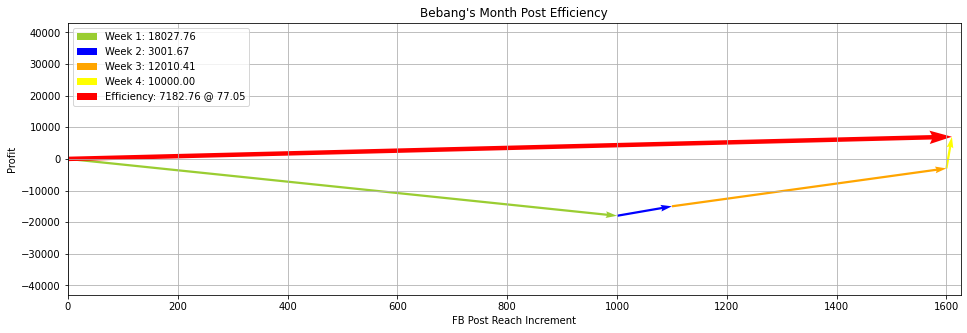

In [12]:
profit= np.array([-18000, 3000, 12000, 10000])    ## You can change the values to make different scenarios
# reach = np.array([10, 500, 100, 1000])             ## You can change the values to make different scenarios
reach = np.array([1000, 100, 500, 10])    

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

<p> The relationship between Reach and Profit is that both are used to plot the necessary vectors to compute for the efficiency. The profit is the Y-axis because we are finding the increase and decrease of the profit consering the FB reach. If profit is in X-axis we wouldn't be able to see the difference when the profit decreases or increases. <br> <br>
     The values of week1, week2, week3 and week4 comes from the array of reach and profit. Using the same concept on the first cell, the values of week1 to week4 will be plotted using the quiver function. First vector would be from the origin to reach[0] and profit[0]. Second vector would be the U,V values of the first vector then the U,V of the second vector would be reach[1] and profit[1]. Third vector's X and Y would be the addition of the arrays of week1 and week2 and the U and V would be week3[0] and week3[1]. Fourth vector's X and Y would be the addition of the arrays of week1, week2 and week3 and its U and V is week4[0] and week4[1].  Then to plot the efficiency, I used the distance formula the same from cell 1 to find the efficiency. <br>
$Performance_{week} = \sqrt{week total_{x}^2+week total_{y}^2}$ <br>
$Reach Gradient = arctan(\frac{y}{\alpha+x})$
<p> From my observation the vectors are directly proportional to the post efficiency. Whenever reach or profit goes up the efficiency goes up and when the reach or profit goes down efficiency also goes down </p>
    
    
   

In [26]:
A = np.array([5, 9])
B = np.array([10, -5])
C = np.array([
    [5,3],
    [9,8]
])

In [32]:
print("Vector A",A)
print("Vector B",B)
print("Vector C",C)
## Describing Vectors
## Shape count the number of rows and columns of the vector
print("vector.shape:")
print(A.shape)
print(C.shape)

## Size counts the total number of elements inside a vector
print("vector.size:")
print(A.size)
print(C.size)

## Ndim counts the dimension of the vector
print("vector.ndim:")
print(A.ndim)
print(B.ndim)
print(C.ndim)

Vector A [5 9]
Vector B [10 -5]
Vector C [[5 3]
 [9 8]]
vector.shape:
(2,)
(2, 2)
vector.size:
2
4
vector.ndim
1
1
2


In [39]:
## Vector operations

## Addition
print("Addition:")
vec_sum = A + B
print(vec_sum)

## Multiplication
vec_prod = A*B
print("Multiplication")
print(vec_prod)

## Scaling
## Scaling multiplies a scalar value in this case 3 to the vector
print("Scaling")
scaled_A = A*3
print(scaled_A)

Addition:
[15  4]
Multiplication
[ 50 -45]
Scaling
[15 27]


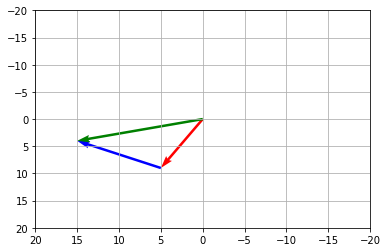

In [47]:
plt.xlim(20,-20)
plt.ylim(20,-20)


plt.quiver(0,0, A[0], A[1], angles='xy', scale_units='xy',scale=1, color='red') # Red --> A
plt.quiver(A[0], A[1], B[0], B[1], angles='xy', scale_units='xy',scale=1, color='b') # Blue --> B
R = A+B
plt.quiver(0,0,R[0],R[1],angles = 'xy',scale_units='xy',scale=1,color='g')
plt.grid()
plt.show()